In [142]:
#Polynomial for regression 
#For learning only not a best function for fitting this data
#Feature scaling - If data is not scalled numpy will be unable to work on higher order value 
import numpy as np
area = np.array([1.1, 4.0, 6.0, 7, 8, 9, 12, 13.0, 14, 15, 18, 20, 21, 22, 23, 25, 26, 26, 28,29])
price = np.array([100, 200, 260, 280, 300, 320, 340, 342, 343, 345, 370, 375, 380, 400, 410, 420, 430, 440, 450, 470])
avg = np.average(area)
area = area / avg

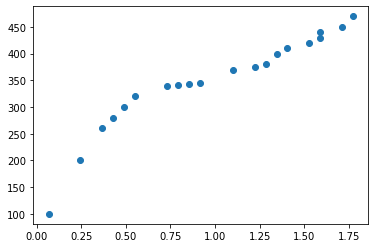

In [143]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(area,price)

In [144]:
def cost_function(x, y, w, b):
    ts_count = x.shape[0]
    cost = 0
    for i in range(ts_count):
        x_tmp = np.array([x[i], x[i] ** 2 , x[i] ** 3])
        err = np.dot(w, x_tmp) + b - y[i]
        cost += err ** 2
    return 1 / (2 * ts_count) * cost

In [146]:
cost_function(area, price , np.array([0.1, 0.2, 0.3]), 1.5)

63763.17045934094

In [147]:
def gradient_descent(x, y, w, b):
    tc_count = x.shape[0]
    
    dw = np.zeros([w.shape[0]])
    db = 0
    
    for i in range(tc_count):
        x_tmp = np.array([x[i], x[i] ** 2 , x[i] ** 3 ])
        err = np.dot(w, x_tmp) + b - y[i]
        db += err
        dw += err * x_tmp
    
    return (dw / tc_count , db / tc_count)

In [148]:
gradient_descent(area, price, np.array([0.1, 0.2, 0.3]),1)

(array([-388.84545614, -514.57041623, -739.50138583]), -346.8659921246817)

In [149]:
def train(x, y, w, b, alpha, itr):
    j_history = []
    for i in range(itr):
        #j_history.append(cost_function(x, y, w, b)) 
        w_tmp , b_tmp = gradient_descent(x, y, w, b)
        w -= alpha * w_tmp
        b -= alpha * b_tmp
    return (w , b)

In [158]:
itr = 50000
alpha = 0.012
w = np.zeros(3)
b = 0 
w_final , b_final = train(area, price, w, b, alpha, itr)
print(f"Final w ->  {w_final} b final ->  {b_final}")

Final w ->  [ 381.54258218 -187.69342079   42.84760813] b final ->  128.60509289353044


In [159]:
area_p = 11 / avg
area_p = np.array([area_p , area_p ** 2 , area_p ** 3])
predict_price = np.dot(w_final, area_p) + b_final
print(f"Predicted price -> {predict_price}")

Predicted price -> 313.3531803451048
